# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1619528787164_0004,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)

## Importing

Now, import the installed packages from the previous block below.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [3]:
biz = spark.read.json('s3://sta9760s2021spark/yelp/yelp_academic_dataset_business.json')
review = spark.read.json('s3://sta9760s2021spark/yelp/yelp_academic_dataset_review.json')
user = spark.read.json('s3://sta9760s2021spark/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
biz.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|       city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|       921 Pearl St|[,, 'beer_and_win...|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|    Boulder|[11:0-23:0, 11:0-...|      1|   40.0175444|   -105.2833481| Oskar Blues Taproom|      80302|          86|  4.0|   CO|
|7000 NE Airport Way|[,, u'beer_and_wi...|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|   Portland|[5:0-18:0, 5:0-18...|      1|45.5889058992|-122.

## Overview of Data

Display the number of rows and columns in our dataset.

In [5]:
print(f"Number of columns in Business table: {len(biz.columns)}")
print(f"Number of rows in Business table: {biz.count()}")
print(f"Number of columns in User table: {len(user.columns)}")
print(f"Number of rows in User table: {user.count()}")
print(f"Number of columns in Review table: {len(review.columns)}")
print(f"Number of rows in Review table: {review.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table: 14
Number of rows in Business table: 160585
Number of columns in User table: 22
Number of rows in User table: 2189457
Number of columns in Review table: 9
Number of rows in Review table: 8635403

Display the DataFrame schema below.

In [6]:
biz.printSchema()
user.printSchema()
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [7]:
biz.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [8]:
from pyspark.sql.functions import explode,split

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
biz_cat = biz.select("business_id","categories")
biz_cat.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|Gyms, Active Life...|
+--------------------+--------------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

In [10]:
biz_cat_exploded = biz_cat.withColumn('categories',explode(split('categories',', ')))
biz_cat_exploded.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [11]:
biz_cat_exploded.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [12]:
biz_cat_exploded.groupby('categories').count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|    Historical Tours|   78|
|      Dermatologists|  351|
|      Paddleboarding|   67|
| Mobile Home Dealers|    6|
|    Hot Air Balloons|    8|
|       Data Recovery|  141|
|       Skating Rinks|   84|
|       Videographers|  110|
|   Pet Waste Removal|   16|
|         Boat Repair|   77|
|              Fondue|   33|
|     Pet Photography|   41|
|             Beaches|   86|
|        Aerial Tours|    8|
|        Contract Law|   12|
|Faith-based Crisi...|    2|
|            Day Spas| 2356|
|         Hobby Shops|  610|
|               Reiki|  277|
|            Honduran|   12|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [13]:
biz_cat_sorted = biz_cat_exploded.groupby('categories').count().orderBy('count',ascending = False)
biz_cat_sorted.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

In [14]:
bc_top20_df = biz_cat_sorted.limit(20).toPandas()
bc_top20_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   categories  count
0                 Restaurants  50763
1                        Food  29469
2                    Shopping  26205
3               Beauty & Spas  16574
4               Home Services  16465
5            Health & Medical  15102
6              Local Services  12192
7                   Nightlife  11990
8                        Bars  10741
9                  Automotive  10119
10  Event Planning & Services   9644
11                Active Life   9231
12               Coffee & Tea   7725
13                 Sandwiches   7272
14                    Fashion   6599
15     American (Traditional)   6541
16                Hair Salons   5900
17                      Pizza   5756
18            Hotels & Travel   5703
19         Breakfast & Brunch   5505

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

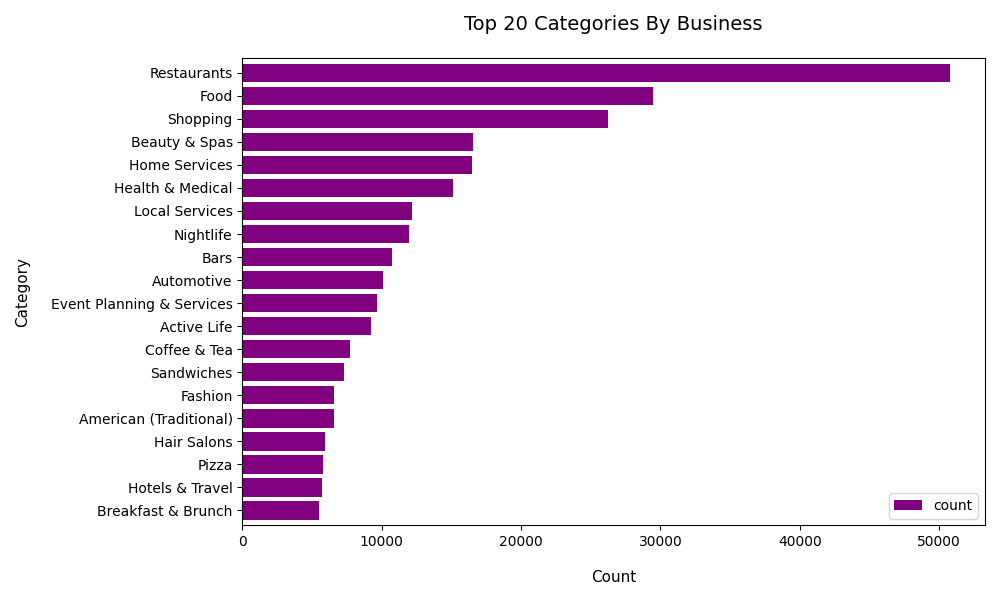

In [15]:
ax = bc_top20_df.plot(kind='barh', x='categories', y='count', 
            figsize=(10, 6), color = "purple", width = 0.8)
ax.set_xlabel("Count", size=11, labelpad = 15)
ax.set_ylabel("Category", size=11, labelpad = 15)
ax.set_title("Top 20 Categories By Business", size=14,pad = 20)
plt.tight_layout()
plt.gca().invert_yaxis()
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [16]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [17]:
review_sub = review.select('business_id','stars')
review_sub.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [18]:
avg_stars = review_sub.groupby('business_id').mean()
avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|Agq4zoNLSIpT1_ZJb...| 4.388571428571429|
|3ZVgig7uux9jVtEZn...| 4.019120458891013|
|HXYJIJ7lDhOUjaOvj...| 4.743589743589744|
|uSHEuUnh9d4kabRfs...| 3.686900958466454|
|8oz6JU_1D8PaLDNvq...|4.6521739130434785|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [19]:
biz_sub = biz.select('business_id', 'name', 'city', 'state', 'stars')
rev_biz = avg_stars.join(biz_sub, biz_sub.business_id == avg_stars.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [20]:
rev_biz_new = rev_biz.select("name","city","state","avg(stars)","stars")
rev_biz_new.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+
|                name|        city|state|        avg(stars)|stars|
+--------------------+------------+-----+------------------+-----+
|             Safeway|   Vancouver|   WA|1.9090909090909092|  2.0|
|Cracker Barrel Ol...|Pickerington|   OH| 2.966292134831461|  3.0|
| Peaceful Restaurant|   Vancouver|   BC|  2.81981981981982|  3.0|
|      ATX Architects|      Austin|   TX|               5.0|  5.0|
|    Evergreen Eatery|      Boston|   MA| 4.524271844660194|  4.5|
+--------------------+------------+-----+------------------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [21]:
from pyspark.sql.functions import col
rev_biz2 = rev_biz_new.withColumn("skew",(col("avg(stars)") - col("stars")) / col("stars"))
skew_df = rev_biz2.select('skew').toPandas()
rev_biz2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+--------------------+
|                name|        city|state|        avg(stars)|stars|                skew|
+--------------------+------------+-----+------------------+-----+--------------------+
|             Safeway|   Vancouver|   WA|1.9090909090909092|  2.0|-0.04545454545454...|
|Cracker Barrel Ol...|Pickerington|   OH| 2.966292134831461|  3.0|-0.01123595505617...|
| Peaceful Restaurant|   Vancouver|   BC|  2.81981981981982|  3.0|-0.06006006006006004|
|      ATX Architects|      Austin|   TX|               5.0|  5.0|                 0.0|
|    Evergreen Eatery|      Boston|   MA| 4.524271844660194|  4.5|0.005393743257820876|
+--------------------+------------+-----+------------------+-----+--------------------+
only showing top 5 rows

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

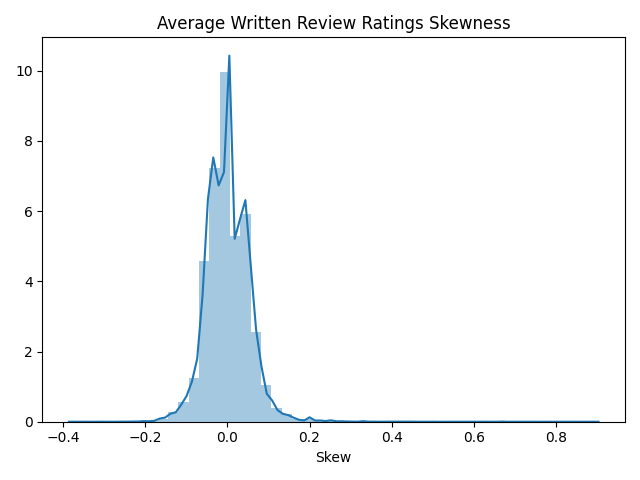

In [47]:
plt.figure()
sns.distplot(skew_df)
plt.title('Average Written Review Ratings Skewness', fontsize = 12)
plt.xlabel('Skew')
plt.tight_layout()
plt.show()
%matplot plt

Yelp written reviews seem to be true to the business ratings. They seem to be a little more positive and satisfied than normal because the distribution is skew to the right slightly. There are some outliers as well as we can see the right tail is long but very slim.

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

Firstly, join the User and the Review table then filter out the non-elite written reviews and ratings.
Secondly, join the resultant table with the Business table 

In [23]:
elite_user = user.select("user_id","elite").filter(user.elite != "")
elite_user.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|             user_id|               elite|
+--------------------+--------------------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|
|D6ErcUnFALnCQN4b1...|           2010,2011|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011|
+--------------------+--------------------+
only showing top 5 rows

In [24]:
elite_review = elite_user.join(review, on = ['user_id'], how = 'left').select("user_id","review_id","business_id","stars")
elite_review = elite_review.withColumnRenamed('stars',"rev_stars")
elite_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+
|             user_id|           review_id|         business_id|rev_stars|
+--------------------+--------------------+--------------------+---------+
|-1KKYzibGPyUX-Mwk...|YBhfh-5jUv0IZSQp9...|ROa5tRU4lUn1ffu0H...|      5.0|
|-1KKYzibGPyUX-Mwk...|vN-espiuzK3c0PaOo...|SFqFFIA4Ks2oHfgEA...|      5.0|
|-3i9bhfvrM3F1wsC9...|XkxiFjCzXvHaWSV8F...|H6UPhaA9lVe2w07QC...|      4.0|
|-3i9bhfvrM3F1wsC9...|fg2UnEvhhHx8D6hhr...|wVTbg_ZOjqYwMNTdf...|      4.0|
|-3i9bhfvrM3F1wsC9...|lKQZOJg6nTPGaLifi...|OJqn7poj4dTCpRDDa...|      4.0|
+--------------------+--------------------+--------------------+---------+
only showing top 5 rows

In [25]:
df = elite_review.join(biz,on = ['business_id'], how = 'left').select("user_id","review_id","business_id","rev_stars","stars")
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+---------+-----+
|             user_id|           review_id|         business_id|rev_stars|stars|
+--------------------+--------------------+--------------------+---------+-----+
|-1KKYzibGPyUX-Mwk...|YBhfh-5jUv0IZSQp9...|ROa5tRU4lUn1ffu0H...|      5.0|  4.5|
|-1KKYzibGPyUX-Mwk...|vN-espiuzK3c0PaOo...|SFqFFIA4Ks2oHfgEA...|      5.0|  4.5|
|-3i9bhfvrM3F1wsC9...|XkxiFjCzXvHaWSV8F...|H6UPhaA9lVe2w07QC...|      4.0|  4.0|
|-3i9bhfvrM3F1wsC9...|lKQZOJg6nTPGaLifi...|OJqn7poj4dTCpRDDa...|      4.0|  4.0|
|-3i9bhfvrM3F1wsC9...|UKKGuKCeHf-iLg89r...|9-gSCzV0UsZuO07m6...|      5.0|  4.0|
+--------------------+--------------------+--------------------+---------+-----+
only showing top 5 rows

In [26]:
from pyspark.sql.functions import round

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# Calculate and Round the average rating per business from elite users only 
df1 = df.select("business_id","rev_stars").groupby("business_id").mean()
df1 = df1.select("business_id",round("avg(rev_stars)",1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# Rename the column
df1 = df1.withColumnRenamed("round(avg(rev_stars), 1)","avg_elite_stars")
df1.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'avg_elite_stars']

In [29]:
# Create a dataframe that includes the business stars and the average elite stars
df2 = df1.join(df, on = ['business_id'], how = 'left').select("business_id","stars","avg_elite_stars").distinct()
df2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+---------------+
|         business_id|stars|avg_elite_stars|
+--------------------+-----+---------------+
|-36nnCT71XE0InJXK...|  2.0|            2.0|
|-QOl03c2B22yi_On0...|  3.0|            3.4|
|-VVUUPK0ytYjpJ_S7...|  3.0|            2.8|
|-ZzsPlaAgwO3yt29u...|  5.0|            5.0|
|-gdR559hH89jagbHz...|  4.5|            4.2|
+--------------------+-----+---------------+
only showing top 5 rows

In [30]:
# Number of businesses that are rated by elite users
df2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

130047

In [31]:
# Similarly, calculate the "skew", if the skew is positive, elite users have better experience than normal
# if the skew is negative, elite users have worse experience than normal
df3 = df2.withColumn("skew",(col("avg_elite_stars") - col("stars")) / col("stars"))
df4 = df3.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
df4

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            skew
0       0.000000
1       0.133333
2      -0.066667
3       0.000000
4      -0.066667
...          ...
130042  0.028571
130043  0.050000
130044 -0.033333
130045  0.428571
130046  1.000000

[130047 rows x 1 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

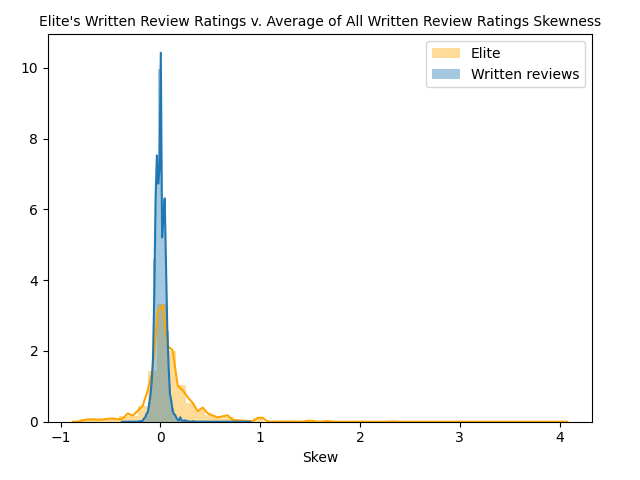

In [49]:
# Plot the skew on top of the skew calculated from all written reviewer to compare
plt.figure()
sns.distplot(df4, color = "orange")
sns.distplot(skew_df)
plt.title("Elite's Written Review Ratings v. Average of All Written Review Ratings Skewness",fontsize = 10)
plt.xlabel('Skew')
plt.legend(["Elite","Written reviews"])
plt.tight_layout()
plt.show()
%matplot plt

From the distribution plot above, we can see that the ratings from elite users, who also wrote reviews, are closer to the actual business ratings because most skew values are around 0. Therefore, we should trust elite users.

The orange distribution is also right skew due to outliers; however, its right tail is not as flat as the blue distribution, which is the skew between written review ratings and business ratings. Because its right tail is thicker, it implies that most elite users had better experience than normal.